In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import euclidean
import random
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


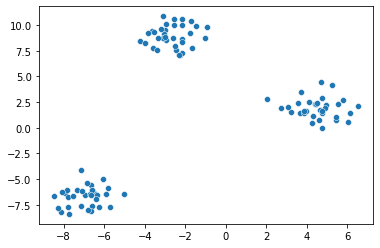

In [2]:
#make the data with the help of sklearns make_blobs function
X,y=make_blobs(centers=3,random_state=42)
#scatter the values to look at the graph
sns.scatterplot(X[:,0],X[:,1])

*Implementing KMeans Algorithm from scratch.* 
-------------------------------------------------------------

Algorithm:
1. Randomly initialise K clusters (Centroids)
2. Repeat(for max_iterations):
        #cluster assignment.
        for i=1 to m(training samples):
            C(i) = index(from 1 to K) of cluster centroid closest to x(i)
        #moving centroid.
        for k=1 to K:
            centroid(k) = avg(mean) of all points assigned to cluster k
        

In [3]:
class Cluster:
    def __init__(self,center):
        #center of the cluster
        self.center=center
        #points of a cluster
        self.points=[]

class My_KMeans:
    def __init__(self,n_clusters,max_iterations):
        self.n_clusters=n_clusters
        self.max_iterations=max_iterations
    
    def fit(self,X):
        clusters=[]
        #choose random points from the training data as cluster center(no of cluster centers==n_clusters)
        for i in range(self.n_clusters):
            cluster=Cluster(center=random.choice(X))
            clusters.append(cluster)
        for i in range(self.max_iterations):
            labels=[]
            #calculate the distance from every cluster centroid
            for point in X:
                distances=[]
                for cl in clusters:
                    distances.append(euclidean(point,cl.center))
                #find the closest cluster
                closest_idx=np.argmin(distances)
                closest_cluster=clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)
            #move the centroid to mean of all points in that cluster
            for cl in clusters:
                cl.center=np.mean(cl.points,axis=0)
        self.labels_=labels
        self.cluster_centers_=[cl.center for cl in clusters]

Clustering Using Custom Implementation Of KMeans:

[array([-2.67450456,  8.95523311]), array([-6.91137177, -6.47315457]), array([3.86435732, 1.42417994])]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


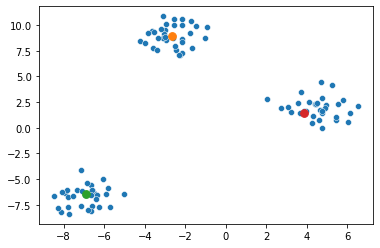

In [4]:
my_model=My_KMeans(n_clusters=3,max_iterations=10)
my_model.fit(X)
print(my_model.cluster_centers_)
sns.scatterplot(X[:,0],X[:,1])
#plot the centroids of all clusters
for center in my_model.cluster_centers_:
    plt.scatter(center[0],center[1],s=60)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


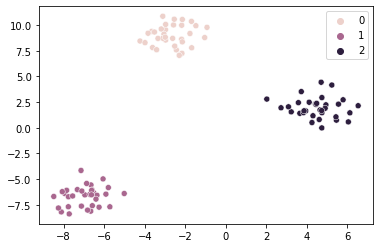

In [5]:
sns.scatterplot(X[:,0],X[:,1],hue=my_model.labels_)

Clustering Using In-Built Sklearn KMeans Class:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([[-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.66780392,  8.93576069]])

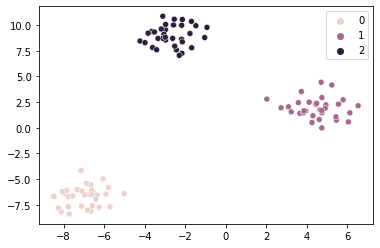

In [6]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(X)
y_generated=model.labels_
sns.scatterplot(X[:,0],X[:,1],hue=y_generated)
model.cluster_centers_

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


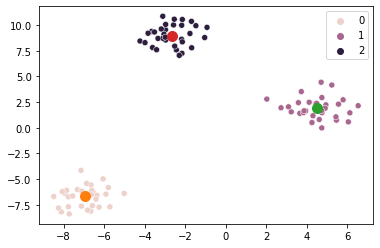

In [7]:
sns.scatterplot(X[:,0],X[:,1],hue=y_generated)
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=100)